In [ ]:
!pip install -q kaggle
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d puneet6060/intel-image-classification

 97% 336M/346M [00:02<00:00, 204MB/s]
100% 346M/346M [00:02<00:00, 122MB/s]


In [ ]:
! unzip intel-image-classification.zip                           #specify your dataset

In [ ]:

! kaggle datasets download -d kmader/food41

100% 5.29G/5.30G [00:57<00:00, 51.7MB/s]
100% 5.30G/5.30G [00:57<00:00, 99.6MB/s]


In [ ]:
!unzip food41

In [ ]:

! kaggle datasets download -d alessiocorrado99/animals10

 98% 574M/586M [00:04<00:00, 129MB/s]
100% 586M/586M [00:04<00:00, 134MB/s]


In [ ]:
! unzip animals10.zip


In [ ]:

import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [ ]:

class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [ ]:

from tensorflow.keras.utils import to_categorical
def load_food_data():
    i = 0
    label = 2
    datasets = ['/content/food']
    output = []
    # Iterate through training and test sets
    for dataset in datasets:
        train_images = []
        test_images = []
        train_labels = []
        test_labels = []
        print("Loading {}".format(dataset))
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):   
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
               # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 

                
                
                # Append the image and its corresponding label to the output
                if i >= 51:
                  i = 0
                  break
                i += 1
                if i <= 40:
                  train_images.append(image)
                  train_labels.append(label)
                
                else:
                  test_images.append(image)
                  test_labels.append(label)
                
        train_images = np.array(train_images, dtype = 'float32')
        train_labels = np.array(train_labels, dtype = 'int32')
        train_y = train_labels

        test_images = np.array(test_images, dtype = 'float32')
        test_labels = np.array(test_labels, dtype = 'int32')
        test_y = test_labels       
        
        output.append((train_images, train_y))
        output.append((test_images, test_y))

    return output

In [ ]:
(X_food_train, y_food_train), (X_food_test, y_food_test) = load_food_data()



Loading /content/food


  5%|▌         | 51/1000 [00:00<00:04, 207.67it/s]


In [ ]:
X_food_train.shape, X_food_test.shape, y_food_train.shape, y_food_test.shape

((4040, 150, 150, 3), (1111, 150, 150, 3), (4040,), (1111,))

In [ ]:

def load_animals_data():
    i = 0
    label = 3
    datasets = ['/content/animals']
    output = []
    # Iterate through training and test sets
    for dataset in datasets:
        train_images = []
        test_images = []
        train_labels = []
        test_labels = []
        print("Loading {}".format(dataset))
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):   
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
               # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 

                
                
                # Append the image and its corresponding label to the output
                if i >= 501:
                  i = 0
                  break
                i += 1
                if i <= 400:
                  train_images.append(image)
                  train_labels.append(label)
                
                else:
                  test_images.append(image)
                  test_labels.append(label)
                
        train_images = np.array(train_images, dtype = 'float32')
        train_labels = np.array(train_labels, dtype = 'int32')
        train_y = train_labels

        test_images = np.array(test_images, dtype = 'float32')
        test_labels = np.array(test_labels, dtype = 'int32')
        test_y = test_labels       
        
        output.append((train_images, train_y))
        output.append((test_images, test_y))

    return output

In [ ]:
(X_animals_train, y_animals_train), (X_animals_test, y_animals_test) = load_animals_data()



Loading /content/animals


 35%|███▍      | 501/1446 [00:01<00:02, 342.84it/s]


In [ ]:

X_animals_train.shape, X_animals_test.shape, y_animals_train.shape, y_animals_test.shape

((4000, 150, 150, 3), (1010, 150, 150, 3), (4000,), (1010,))

In [ ]:

!mv -v /content/seg_test/seg_test/forest/sea/* /content/seg_test/seg_test/forest/

In [ ]:

!rm -r /content/seg_test/seg_test/.ipynb_checkpoints 

In [ ]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [ ]:
class_names = ['city', 'nature']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator as idg
classes = idg().flow_from_directory("/content/seg_train/seg_train",class_mode = 'categorical').class_indices
num_classes = len(classes)
num_classes

Found 11630 images belonging to 2 classes.


2

In [ ]:
classes

{'.ipynb_checkpoints': 0, 'city': 1, 'nature': 2}

In [ ]:

os.listdir('/content/seg_train/seg_train')

['forest', 'buildings', 'sea', 'street', 'glacier', 'mountain']

In [ ]:
from tensorflow.keras.utils import to_categorical
def load_data():
    datasets = ['/content/seg_train/seg_train', '/content/seg_test/seg_test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        k = -1
        images = []
        labels = []
        print("Loading {}".format(dataset))       
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            k += 1
            label = k
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
              if file.endswith('.jpg'):
               # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)  
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')
        y = labels     
        
        output.append((images, y))

    return output

In [ ]:
(X_train, y_train), (X_test, y_test) = load_data()

Loading /content/seg_train/seg_train


100%|██████████| 7058/7058 [00:03<00:00, 2073.56it/s]


Loading /content/seg_test/seg_test


100%|██████████| 1510/1510 [00:00<00:00, 2096.76it/s]


In [ ]:

np.unique(y_train), np.unique(y_test)

(array([0, 1], dtype=int32), array([0, 1], dtype=int32))

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10000, 150, 150, 3), (18000,), (2000, 150, 150, 3), (2000,))

In [ ]:
y_train.shape

(16000,)

In [ ]:
X_train, y_train = shuffle(X_train, y_train, random_state=25)

In [ ]:
X_test, y_test = shuffle(X_test, y_test, random_state=25)


In [ ]:

X_train, y_train = X_train[:8000], y_train[:8000]

X_test, y_test = X_test[:2000], y_test[:2000]

X_food_train, y_food_train, X_animals_train, y_animals_train = X_food_train[:4000], y_food_train[:4000], X_animals_train[:4000], y_animals_train[:4000]

X_food_test, y_food_test, X_animals_test, y_animals_test = X_food_test[:1000], y_food_test[:1000], X_animals_test[:1000], y_animals_test[:1000]


In [ ]:
np.unique(y_test)


array([2, 3], dtype=int32)

In [ ]:

np.unique(y_train)

array([0, 1], dtype=int32)

In [ ]:
y_test_flipped


array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
y_train = np.concatenate ((y_animals_train, y_food_train, y_train))

y_train.shape

#y_train = to_categorical(y_train, 4)



(16000,)

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3], dtype=int32)

In [ ]:
y_train_final = to_categorical(y_train, num_classes = 4)
y_train_final.shape

(16000, 4)

In [ ]:

X_train_final = np.concatenate((X_animals_train, X_food_train, X_train))

X_train_final.shape

(16000, 150, 150, 3)

In [ ]:

X_test_final = np.concatenate((X_animals_test, X_food_test, X_test))

y_test_final = np.concatenate((y_animals_test, y_food_test, y_test))

X_test_final.shape, y_test_final.shape

((4000, 150, 150, 3), (4000,))

In [ ]:

y_test_final = to_categorical(y_test_final, num_classes = 4)
y_test_final.shape

(4000, 4)

In [ ]:
type(X_train),type(y_train)

(numpy.ndarray, numpy.ndarray)

In [ ]:
len(X_train)

14034

In [ ]:
X_train_rescaled = X_train_final / 255.0

In [ ]:

X_test_rescaled = X_test_final / 255.0

In [ ]:
X_train_final, y_train_final = shuffle(X_train_final, y_train_final, random_state=25)

In [ ]:
from tensorflow.keras import models,Sequential,layers

In [ ]:
model = Sequential()

# Convolutional layer and maxpool layer 1
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 1 for Screenshots or 0 for others 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(layers.Dense(6,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.models import Model

#model.summary()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
# es = EarlyStopping(patience = 10, restore_best_weights = True)
# history = model.fit(X_train_rescaled,y_train,
#          batch_size=64, 
#          epochs=100, 
#          validation_split=0.3,
#          callbacks=[es],
#          verbose = 1)

In [ ]:
X_train_rescaled.shape,y_train.shape

((14034, 150, 150, 3), (14034, 6))

In [ ]:
model.evaluate(X_test_rescaled,y_test)

94/94 [==============================] - 1s 8ms/step - loss: 0.4969 - accuracy: 0.8220


[0.49694356322288513, 0.8220000267028809]

In [ ]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

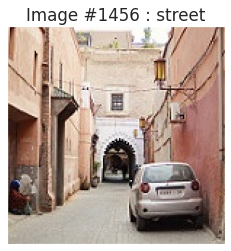

In [ ]:
predictions = model.predict(X_test_rescaled)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, X_test_rescaled, pred_labels)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

def load_model():
    # $CHALLENGIFY_BEGIN
    vgg = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
    # $CHALLENGIFY_END
    
    return vgg

In [ ]:
# vgg = load_model()
# vgg.summary()

In [ ]:
def set_nontrainable_layers(vgg):
    # Set the first layers to be untrainable
    vgg.trainable = False
    
    return vgg

# vgg
# vgg = set_nontrainable_layers(vgg)

# vgg.summary()

In [ ]:
from tensorflow.keras import layers, models

def add_last_layers(vgg):
    '''Take a pre-trained model, set its parameters as non-trainables, and add additional trainable layers on top'''
    # $CHALLENGIFY_BEGIN
    base_model = set_nontrainable_layers(vgg)
    flatten_layer = layers.Flatten()
    dense_layer_1 = layers.Dense(256, activation='relu')
    dense_layer_2 = layers.Dense(64, activation='relu')
    prediction_layer = layers.Dense(4, activation='softmax')
    
    
    vgg = models.Sequential([
        base_model,
        flatten_layer,
        dense_layer_1,
        dense_layer_2,
        prediction_layer
    ])
    # $CHALLENGIFY_END
    return vgg

In [ ]:
# vgg = add_last_layers(vgg)
# vgg.summary()

In [ ]:
from tensorflow.keras import optimizers

def build_model():
    # Step 1 - Loading VGG16
    # without the dense layers
    # based on the imagenet weights    

    vgg = load_model()

    # Step 2 
    # Setting the imagenet weights to be non-trainable
    # adding the Flatten + Dense + Prediction Lazers
    vgg = add_last_layers(vgg)
    
    # Step 3
    # Compiling
    opt = optimizers.Adam(learning_rate=1e-4)
    vgg.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return vgg
    # $CHALLENGIFY_END

In [ ]:
customized_vgg = build_model()
customized_vgg.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
Total params: 16,828,804
Trainable params: 2,114,116
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:
X_train = preprocess_input(X_train_final) 
#X_val = preprocess_input(X_val)
X_test = preprocess_input(X_test_final)

In [ ]:
X_train.shape,y_train.shape

((16000, 150, 150, 3), (16000,))

In [ ]:

X_train[0]

array([[[ -65.939   ,  -73.779   ,  -77.68    ],
        [ -97.939   , -105.779   , -111.68    ],
        [ -60.939003,  -67.779   ,  -75.68    ],
        ...,
        [-101.939   , -111.779   , -113.68    ],
        [-101.939   , -113.779   , -110.68    ],
        [-103.939   , -116.779   , -113.68    ]],

       [[ -55.939003,  -65.779   ,  -68.68    ],
        [-103.939   , -116.779   , -122.68    ],
        [ -62.939003,  -70.779   ,  -78.68    ],
        ...,
        [-100.939   , -110.779   , -112.68    ],
        [-100.939   , -110.779   , -109.68    ],
        [ -98.939   , -109.779   , -106.68    ]],

       [[ -59.939003,  -73.779   ,  -76.68    ],
        [ -98.939   , -112.779   , -117.68    ],
        [ -63.939003,  -76.779   ,  -83.68    ],
        ...,
        [-100.939   , -110.779   , -112.68    ],
        [ -96.939   , -106.779   , -105.68    ],
        [-101.939   , -109.779   , -107.68    ]],

       ...,

       [[-101.939   , -116.779   , -123.68    ],
        [-1

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, verbose=1, restore_best_weights=False)

history = customized_vgg.fit(X_train, y_train_final,
                    validation_split=0.3,
                    shuffle = True, 
                    epochs=50, 
                    batch_size=16, 
                    callbacks=[es])

Epoch 1/50
700/700 [==============================] - 36s 30ms/step - loss: 0.3643 - accuracy: 0.9607 - val_loss: 0.1904 - val_accuracy: 0.9715
Epoch 2/50
700/700 [==============================] - 20s 28ms/step - loss: 0.0267 - accuracy: 0.9956 - val_loss: 0.2420 - val_accuracy: 0.9710
Epoch 3/50
700/700 [==============================] - 20s 28ms/step - loss: 0.0042 - accuracy: 0.9991 - val_loss: 0.2459 - val_accuracy: 0.9700
Epoch 4/50
700/700 [==============================] - 20s 28ms/step - loss: 0.0044 - accuracy: 0.9991 - val_loss: 0.2483 - val_accuracy: 0.9700
Epoch 5/50
700/700 [==============================] - 20s 28ms/step - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.2895 - val_accuracy: 0.9731
Epoch 6/50
700/700 [==============================] - 20s 28ms/step - loss: 0.0118 - accuracy: 0.9986 - val_loss: 0.2948 - val_accuracy: 0.9765
Epoch 7/50
700/700 [==============================] - 20s 28ms/step - loss: 0.0212 - accuracy: 0.9964 - val_loss: 0.3401 - val_accuracy:

In [ ]:
result = customized_vgg.evaluate(X_test,y_test_final)

125/125 [==============================] - 6s 35ms/step - loss: 0.3548 - accuracy: 0.9843


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


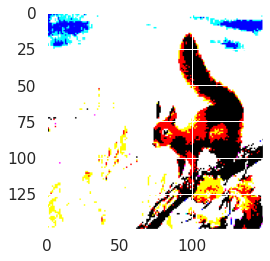

In [ ]:
X_test.shape, y_test_final.shape


plt.imshow(X_test_final[])

In [ ]:

X_test_look = X_test_final / 255

X_train_look = X_train_final / 255

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


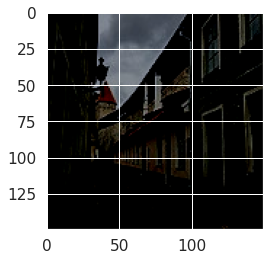

In [ ]:
plt.imshow(X_train_look[0])

In [ ]:
customized_vgg.save('photo_multi_classifier.h5')

In [ ]:
y_train_final[0]

array([1., 0., 0., 0.], dtype=float32)

In [ ]:
customized_vgg.predict(np.expand_dims(X_test[1012],axis=0))

array([[0.000000e+00, 0.000000e+00, 1.000000e+00, 2.158693e-33]],
      dtype=float32)

In [ ]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(X_test_final[index]/255.)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

In [ ]:
pred_new = customized_vgg.predict(np.expand_dims(X_test[23],axis=0))
pred = [round(val) for val in pred_new[0]]
if 1 in pred:
  print(pred.index(1))

[0, 0, 0, 1]
3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


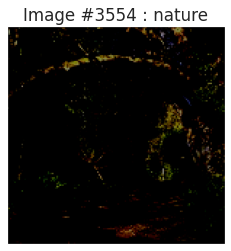

In [ ]:
predictions = customized_vgg.predict(X_test)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability
class_names = ['city','nature','food','animals']
display_random_image(class_names, X_test, pred_labels)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


array([[2.3434890e-26, 1.0000000e+00, 7.6100444e-29, 5.0476662e-32]],
      dtype=float32)

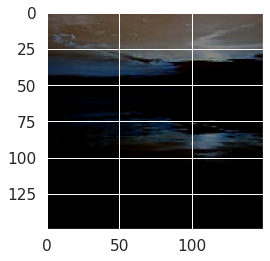

In [ ]:

X_test_classes, y_test_classes = shuffle(X_test, y_test_final, random_state = 25)



plt.imshow(X_test_classes[0] / 255)

customized_vgg.predict(np.expand_dims(X_test_classes[0], axis = 0))

In [ ]:
X